# Riddler Classic -  
_2018-07-06_

https://fivethirtyeight.com/features/how-fast-can-you-deliver-pbjs-how-many-meerkats-can-survive/

>You know the following things about the delicate ecology of scorpions and meerkats:

>A. If there were no meerkats, the population of the scorpions would double every month.

>B. If there were no scorpions, the population of the meerkats would halve every month.

>C. If you had exactly 20 scorpions and five meerkats, both populations would not change at all.

>1. What is the number of meerkats when the desert has as many scorpions as possible?

>2. What is the number of meerkats and the number of scorpions when the meerkat population is increasing by four meerkats per month and the scorpion population is decreasing by two scorpions per month?

>These questions rely on the Lotka-Volterra model of predators and prey. That model makes certain assumptions, including that the prey (the scorpions here) always find ample food, the predators (the meerkats) have limitless appetite, and the rate of change of a population is proportional to its size.

>Extra credit: If you start with 100 scorpions and 10 meerkats, what is the maximum number of meerkats you can have and how long would it take for both populations to return to their starting states?

## Predator-Prey/Lotka-Volterra Model

From Wikipedia, the Lotka-Volterra model of predator-prey populations look like:

$$\frac{dx}{dt} = \alpha x - \beta x y$$

$$\frac{dy}{dt} = \delta x y - \gamma y$$

Where x is number of prey (scorpions), y is the number of predators (meerkats) and \alphs, \beta, \delta, and \gamma are coefficients characteristic of the system.

### Solving for coefficients
Based on A: With $y = 0$, $\frac{x(1)}{x(0)} = 2$ leading to
$$\frac{dx}{dt}\ =\ \alpha x$$
$$\frac{dx}{x}\ =\ \alpha dt$$
$$ln\ x\ =\ \alpha t + constant$$
$$x(t)\ =\ x_0e^{\alpha t}$$
Substituting in monthly doubling:
$$\frac{x(1)}{x(0)}\ =\ e^{\alpha}$$
$$\alpha\ =\ ln\ 2$$

Based on B: With $x = 0$, $\frac{y(1)}{y(0)} = \frac{1}{2}$ leading to:
$$\frac{dy}{dt}\ =\ -\gamma y$$
$$\frac{dy}{y}\ =\ -\gamma dt$$
$$ln\ y\ =\ -\gamma t + constant$$
$$y(t)\ =\ y_0e^{-\gamma t}$$
Substituting in monthly halving:
$$\frac{y(1)}{y(0)}\ =\ e^{-\gamma}$$
$$\gamma\ =\ -ln\ \frac{1}{2}\ =\ ln\ 2$$

Based on C: $\frac{dx}{dt}\ =\ \frac{dy}{dt}\ =\ 0$ when x = 20 and y = 5:
$$0\ =\ \alpha x - \beta x y$$
and
$$0\ =\ \delta x y - \gamma y$$
Substituting in what we know:
$$0\ =\ 5ln\ 2 - 100\beta$$
and
$$0\ =\ 100\delta - 20ln\ 2$$
Which yields:
$$\beta\ =\ \frac{ln\ 2}{20}$$
and
$$\delta\ =\ \frac{ln\ 2}{5}$$


## Computational analysis

Initial exploration using route following:
http://scipy-cookbook.readthedocs.io/items/LoktaVolterraTutorial.html

In [13]:
from numpy import *
#import pylab as p
import matplotlib.pyplot as plt
# Definition of parameters
import math
a = math.log(2)
b = math.log(2)/5 
c = math.log(2)         #Wikipedia: c = gamma
d = 1/4                 #Wikipedia: d*b = delta
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])

In [14]:
#find fixed points

X_f0 = array([     0. ,  0.])
X_f1 = array([ c/(d*b), a/b])
all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2)) # => True

True

In [15]:
def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])

In [16]:
A_f0 = d2X_dt2(X_f0) 

In [17]:
A_f0

array([[ 0.69314718, -0.        ],
       [ 0.        , -0.69314718]])

In [18]:
A_f1 = d2X_dt2(X_f1)

In [19]:
A_f0

array([[ 0.69314718, -0.        ],
       [ 0.        , -0.69314718]])

In [20]:
X_f1

array([ 20.,   5.])

In [24]:
from scipy import integrate
t = linspace(0, 36,  10000)              # time
X0 = array([100, 10])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     # >>> 'Integration successful.'

'Integration successful.'

In [22]:
%matplotlib inline

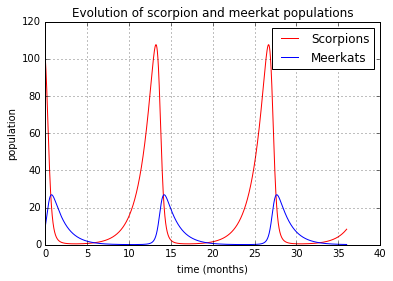

In [26]:
scorpions, meerkats = X.T
f1 = plt.figure()
plt.plot(t, scorpions, 'r-', label='Scorpions')
plt.plot(t, meerkats, 'b-', label='Meerkats')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time (months)')
plt.ylabel('population')
plt.title('Evolution of scorpion and meerkat populations')
f1.savefig('scorpion_and_meerkat_1.png')

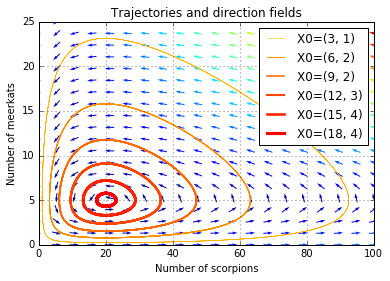

In [32]:
values  = linspace(0.15, 0.9, 6)                          # position of X0 between X_f0 and X_f1
vcolors = plt.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = plt.figure()

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    plt.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = plt.ylim(ymin=0)[1]                        # get axis limits
xmax = plt.xlim(xmin=0)[1]
nb_points   = 20

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
plt.title('Trajectories and direction fields')
Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=plt.cm.jet)
plt.xlabel('Number of scorpions')
plt.ylabel('Number of meerkats')
plt.legend()
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
f2.savefig('scorpions_and_meerkats_2.png')

In [34]:
def IF(X):
    u, v = X
    return u**(c/a) * v * exp( -(b/a)*(d*u+v) )
# We will verify that IF remains constant for different trajectories
for v in values:
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)
    I = IF(X.T)                                 # compute IF along the trajectory
    I_mean = I.mean()
    delta = 100 * (I.max()-I.min())/I_mean
    print('X0=(%2.f,%2.f) => I ~ %.1f |delta = %.3G %%' % (X0[0], X0[1], I_mean, delta))
# >>> X0=( 6, 3) => I ~ 20.8 |delta = 6.19E-05 %
#     X0=( 9, 4) => I ~ 39.4 |delta = 2.67E-05 %
#     X0=(12, 6) => I ~ 55.7 |delta = 1.82E-05 %
#     X0=(15, 8) => I ~ 66.8 |delta = 1.12E-05 %
#     X0=(18, 9) => I ~ 72.4 |delta = 4.68E-06 %

X0=( 3, 1) => I ~ 1.7 |delta = 0.000278 %
X0=( 6, 2) => I ~ 4.9 |delta = 3.33E-05 %
X0=( 9, 2) => I ~ 8.2 |delta = 6.18E-05 %
X0=(12, 3) => I ~ 10.8 |delta = 2.99E-05 %
X0=(15, 4) => I ~ 12.6 |delta = 1E-05 %
X0=(18, 4) => I ~ 13.4 |delta = 4.73E-06 %


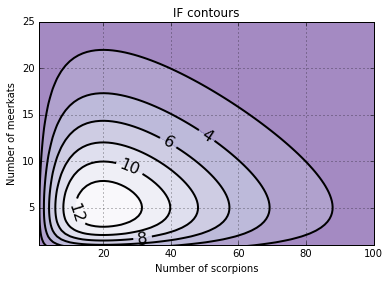

In [36]:
nb_points = 80                              # grid size
x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)
X2 , Y2  = meshgrid(x, y)                   # create the grid
Z2 = IF([X2, Y2])                           # compute IF on each point
f3 = plt.figure()
CS = plt.contourf(X2, Y2, Z2, cmap=plt.cm.Purples_r, alpha=0.5)
CS2 = plt.contour(X2, Y2, Z2, colors='black', linewidths=2. )
plt.clabel(CS2, inline=1, fontsize=16, fmt='%.f')
plt.grid()
plt.xlabel('Number of scorpions')
plt.ylabel('Number of meerkats')
plt.ylim(1, ymax)
plt.xlim(1, xmax)
plt.title('IF contours')
f3.savefig('scorpions_and_meerkats_3.png')
plt.show()